In [4]:
#### 외판원 문제(Traveling Salesman Problem, TSP): NP-난해 문제

#### 무차별 대입 전략(Brute-force strategy)

## 준비
import random
from itertools import permutations
alltours = permutations

def distance_tour(aTour):
    return sum(distance_points(aTour[i - 1], aTour[i]) for i in range(len(aTour)))

aCity = complex

def distance_points(first, second): return abs(first - second)

# 각 도시의 위치(복소수로 좌표 표현)
def generate_cities(number_of_cities):
    seed = 111
    width = 500
    height = 300
    #random.seed((number_of_cities, seed))
    # deprecated된 문법이라 코드 수정
    random.seed(seed)
    return frozenset(aCity(random.randint(1, width), random.randint(1, height))
                    for c in range(number_of_cities))

def brute_force(cities):
    "모든 가능한 투어를 생성한 다음 이동 거리가 가장 짧은 투어를 선택합니다."
    return shortest_tour(alltours(cities))

def shortest_tour(tours): return min(tours, key = distance_tour)


## 시각화할 유틸리티 함수
# 매직커맨드 - show 명령 없이도 바로 그래프 표현 
%matplotlib inline 
import matplotlib.pyplot as plt

# 모든 도시와 도시 간 연결선을 플롯에 그림, 투어를 시작한 도시에 별도의 표시
def visualize_tour(tour, style = 'bo-'):
    if len(tour) > 1000: plt.figure(figsize = (15, 10))
    start = tour[0:1]
    visualize_segment(tour + start, style)
    visualize_segment(start, 'rD')

# 도시와 연결선을 그리는 함수, visualize_tour 함수에 의해 호출
def visualize_segment(segment, style = 'bo-'):
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on = False)
    plt.axis('scaled')
    plt.axis('off')

def X(city): "X axis"; return city.real
def Y(city): "Y axis"; return city.imag

In [6]:
## 입력된 도시 개수에 따라 투어 생성,
## 알고리즘 실행 시간 측정 후 그래프 생성
import time
from collections import Counter
def tsp(algorithm, cities):
    t0 = time.perf_counter()
    tour = algorithm(cities)
    t1 = time.perf_counter()
    assert Counter(tour) == Counter(cities) # 모든 도시는 한 번만 등장해야 한다
    visualize_tour(tour)
    print(f'{name(algorithm)}: {len(tour)} cities = tour length {distance_tour(tour):.3f} (in {t1 - t0:.3f} sec)')

def name(algorithm): return algorithm.__name__.replace('_tsp', '')

brute_force: 10 cities = tour length 882.828 (in 8.520 sec)


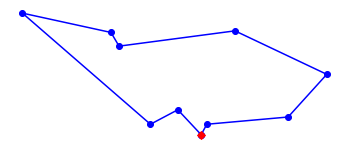

In [7]:
tsp(brute_force, generate_cities(10))

In [10]:
#### 탐욕 알고리즘 사용하기
# 매 순간 그 상황에서만 최적의 도시를 다음 방문지로 결정

def greedy_algorithm(cities, start=None):
    C = start or first(cities)
    tour = [C]
    unvisited = set(cities - {C})
    while unvisited:
        C = nearest_neighbor(C, unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def first(collection): return next(iter(collection))

def nearest_neighbor(A, cities):
    return min(cities, key = lambda C: distance_points(C, A))

greedy_algorithm: 1982 cities = tour length 15690.269 (in 0.369 sec)


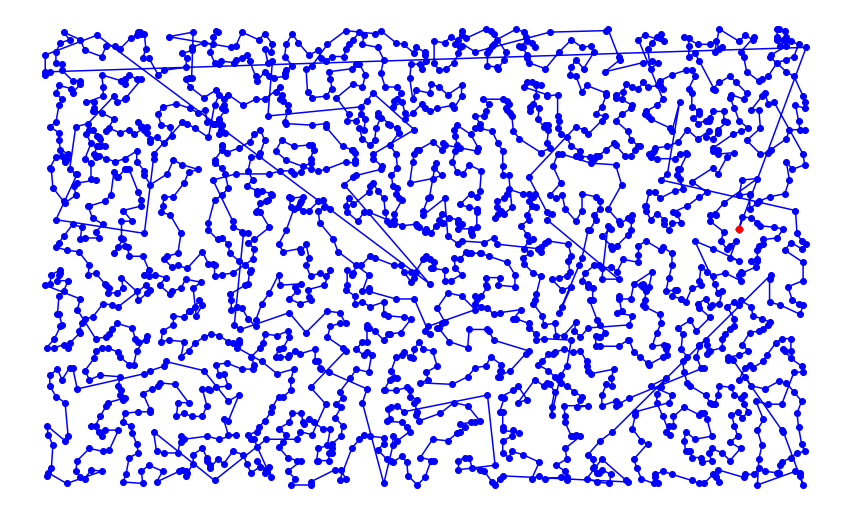

In [9]:
tsp(greedy_algorithm, generate_cities(2000))

In [12]:
#### 페이지랭크(PageRank) 알고리즘
# 각 검색 결과, 또는 검색된 페이지의 중요도를 계산하는 최적의 방법을 찾는 것

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
myWeb = nx.DiGraph()
myPages = range(1, 5)

In [16]:
connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

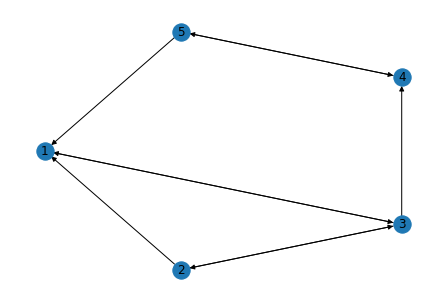

In [17]:
pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)

In [18]:
# 전이 행렬(transition matrix) n * n: n은 노드의 개수
# 한 노드에서 다른 노드로 이동할 확률을 의미

def createPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_matrix(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array([1.0 / count if count > 0 else 0.0 for count in outwards])
    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set) / float(nodes_set)
    if np.min(np.sum(G, axis=0)) < 1.0:
        print('경고: 전이 확률 합의 최솟값이 1보다 작습니다.')
    return G, p

In [19]:
G, p = createPageRank(myWeb)
print(G)

[[0.         0.5        0.33333333 0.         0.5       ]
 [0.         0.         0.33333333 0.         0.        ]
 [1.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.5       ]
 [0.         0.         0.         1.         0.        ]]


In [1]:
#### 선형 계획법(linear programming) 이해하기
# 어떤 제약 조건이 주어졌을 때 변수를 최소화하거나 최대화하는 현실 세계의 문제를 푸는데 널리 쓰임

# 조건1: 문제를 방정식의 집합으로 표현할 수 있어야 함
# 조건2: 방정식에 사용되는 변수 사이에 일차 방정식이 성립해야 함

import pulp
model = pulp.LpProblem('Profit maximising problem', pulp.LpMaximize)

c:\Users\Kang MinJae\AppData\Local\Programs\Python\Python310\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [2]:
A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')

In [5]:
# 목적 함수를 설정합니다.
model += 5000 * A + 2500 * B, 'Profit'

# 제약 조건을 설정합니다.
model += 3 * A + 2 * B <= 20
model += 4 * A + 3 * B <= 30
model += 4 * A + 3 * B <= 44

In [8]:
# solve 함수로 해결책을 계산합니다.
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [9]:
# 결정 변수의 값을 출력합니다.
print(A.varValue)
print(B.varValue)

6.0
1.0


In [10]:
# 목적 함수의 값을 출력합니다.
print(pulp.value(model.objective))

32500.0
